In [2]:
import numpy as np

In [3]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [4]:
walk.min()

-9

In [5]:
walk.max()

29

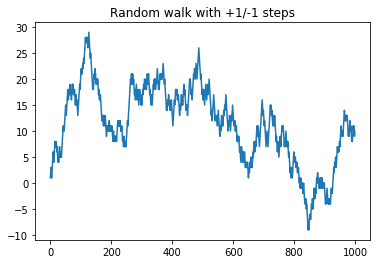

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.title('Random walk with +1/-1 steps')
plt.plot(walk)
plt.show()

In [8]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -3, ..., -16, -17, -18],
       [ -1,   0,  -1, ..., -30, -29, -30],
       [ -1,  -2,  -1, ..., -52, -53, -52],
       ..., 
       [  1,   2,   3, ...,  20,  19,  18],
       [ -1,   0,  -1, ...,  -8,  -9,  -8],
       [ -1,  -2,  -3, ..., -22, -21, -22]])

In [9]:
walks.max()

116

In [10]:
walks.min()

-135

In [11]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ..., False,  True,  True], dtype=bool)

In [12]:
hits30.sum()

3351

In [13]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

502.06833780960909

In [15]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))
steps

array([[ 0.13982554, -0.06696875, -0.06760805, ...,  0.25261885,
        -0.32617296, -0.37977603],
       [-0.33850589, -0.03086511,  0.35532127, ...,  0.39410252,
        -0.65468023,  0.03936658],
       [ 0.09944308, -0.20239974, -0.12507654, ..., -0.01649518,
         0.15878691,  0.12050735],
       ..., 
       [ 0.41578815,  0.2004534 , -0.07366032, ..., -0.09244189,
        -0.25480641,  0.00467038],
       [ 0.31990576, -0.07660829,  0.22390867, ...,  0.18804535,
        -0.08406682,  0.38408963],
       [-0.29374422,  0.09888371, -0.36219689, ...,  0.26232916,
        -0.09194856,  0.14127649]])